<a href="https://colab.research.google.com/github/jchamilton75/CS-ST4-Cosmo-2020/blob/master/ST4_2020_Cosmology_TD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Centrale-Supélec - ST4 - Cosmology 2020 - TD3: Cosmic Microwave Background
Welcome this this second practicle work in cosmology. Today we will work with the. Cosmic Microwave Background

There are a few librairies we need to download and install in order to have everything working (Healpy, pypico, they will be described later). This is all done in the following cell.

You will also need at some point in this notebook to downlod some data files from the professor's Google Drive. In order to do so, you need to authenticate with you Google account, so when executing the following cell, you will be prompted at some point ti enter a verification code. In order to get it, follow these steps:
1. Click on the link that appears in blue just above the prompt for an authentification code
2. This opens a tabb in your browser where you need to choose which Google account you want to use. Select one by clicking on it
3. In this same tab, you are now propmted to allow Google SDK to access your Google account. Click on the blue "Allow" button in the bottom (no worry about this really...)
4. Now you should see appearing a pretty long code that you need to copy in your clipboard 
5. Now come back to the Google Colab notebook and paste this code in the cell where you were prompted to give a code
6. You should be done ! 

In [ ]:
!pip install healpy
import healpy as hp

### Install pypico from Github
!pip install git+https://github.com/marius311/pypico
import pypico
  
#### Reading file from Google Drive
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
rcParams['image.cmap'] = 'jet'


     |████████████████████████████████| 11.8MB 282kB/s 
  Cloning https://github.com/marius311/pypico to /tmp/pip-req-build-cmlfxw6o
  Running command git clone -q https://github.com/marius311/pypico /tmp/pip-req-build-cmlfxw6o
  Created wheel for pypico: filename=pypico-4.0.0-cp36-cp36m-linux_x86_64.whl size=203059 sha256=bf44a7250c5e8c1e2f0329025fb857270f759b18fef4cdbcf2e4e0a9d0ecce16
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgzrup8i/wheels/f6/f6/05/cd46cb1fde0c094dfeb608419538c5b5058d7685c35fcbf9b4
Successfully built pypico


If the execution of the previous cell went fine, you should be all set for starting this practicle work ! Let's have fun !

If some error appears, please contact Jean-Christophe Hamilton through MS Teams...

# Theoretical Angular Power Spectra
Computing the  $C_\ell$ theoretical power spectra for a given cosmology is not a trivial task. It involves solving the Boltzmann Equation along the line of sight in order to account for all the various effects in a realistic manner. However, this is implemented in publicly available codes that allow computing the spectra for any set of cosmological parameters in a user-friendly manner with good python interfaces (CAMB https://camb.readthedocs.io/en/latest/ and CLASS https://lesgourg.github.io/class_public/class.html). 

These codes are however too slow for this demonstration-course purpose: they take of the order of 1 second for a model, which implies a very long time for running MCMC chains. We will therefore rely on a very nice code called PICO (Parameters for the Impatient COsmologist http://arxiv.org/abs/astro-ph/0606709) that interpolates through a set of pre-calculated CAMB models. The execution time is very fast, but the accuracy is not as good as when directly using CAMB or CLASS. PICO is very user-friendly and all it needs is to point to the file containing the precalculated spectra: here jcset_py3.dat.

**I want to thank very warmly the PICO main developper Marius Millea for providing me with this training file which he prepared specifically for this course purpose.**

The installation and import (as pypico) of the PICO library were done in the first cell of this notebook, we just need to dowload from the professor's Google Drive the training set and load it with PICO:

In [ ]:
### Download the training set from Google Drive
download = drive.CreateFile({'id': '17DWeh3xPec2iOXrQxNN2aKNr0uxuoahb'})
download.GetContentFile('jcset_py3.dat')
!ls -lrt

### Import the training set into pypico
pico = pypico.load_pico("jcset_py3.dat")

total 96808
drwxr-xr-x 1 root root     4096 May  4 16:26 sample_data
-rw-r--r-- 1 root root      727 May 14 13:22 adc.json
-rw-r--r-- 1 root root 99120769 May 14 13:22 jcset_py3.dat


With PICO you can play with a number of cosmological parameters for which the training set was done. You can get the list of the cosmological parameters with the following command that displays the parameters with their default values inside a Python data structure known as a "Dictionnary".

In [ ]:
inputs = pico.example_inputs()
print(inputs)

{'As': 2.08e-09, 'ns': 0.97, 'tau': 0.055, 'ombh2': 0.0225, 'omch2': 0.117, 'H0': 50, 'omk': -0.05, 'pivot_scalar': 0.05}


The above parameters are:
- As: Amplitude of the primordial spectrum for scalars
- ns: $n_s$ the spectral index of the primordial spectrum for scalar modes
- tau: the optical depth of reionization: probability of transmission  $\exp(-\tau)$
- ombh2: $\Omega_b h^2$ the baryonic matter density multiplied by the Hubble constant divided by 100
- omch2: $\Omega_c h^2$ the density of Cold-Dark-Matter (non baryonic matter) multiplied by the Hubble constant divided by 100
- H0: $H_0$ the Hubble Parameter
- omk: $\Omega_k$ the density of curvature
- pivot_scalar: the scale at which the scalar power spectrum has a turnaround (don't care about that... this is too technical)

Let's create a parameter dictionary with the best-fit values from the Planck ESA satellite data (https://www.cosmos.esa.int/web/planck/pla):

In [ ]:
planck_pars = inputs.copy()
planck_pars['As'] = np.exp(3.094)/1e10
planck_pars['H0'] = 67.27
planck_pars['ns'] = 0.9645
planck_pars['ombh2'] = 0.02225
planck_pars['omch2'] = 0.1198
planck_pars['omk'] = 0.
planck_pars['tau'] = 0.079

And now, let's calculate a model (note that this training set only contains Temperature spectra for simplicity, so we will not play with Polarization here) and plot it. PICO outputs $D_\ell = C_\ell \times \frac{\ell(\ell+1)}{2\pi}$ which is the usual quantity that is plotted.

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

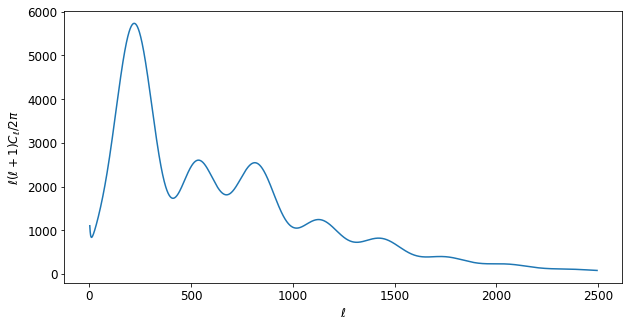

In [ ]:
rc('figure',figsize=(10,5))
dl_TT = pico.get(**planck_pars)['dl_TT']
ell = np.arange(len(dl_TT-2))+2
clf()
plot(ell, dl_TT)
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

## A plotting tip: scatter()
The matplotlib scatter() function (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) is actually very convenient in a number of situations. For instance if you want to plot many curves $y=f(x,a)$ on the same plot with $y$ as a function of $x$, each curve corresponding to a different value of $a$. It is not easy to display a colorbar correspondding to the possible values of the parameter $a$, just adding a call to scatter after plotting makes it possible...

This is demonstrated in the following example with a cosine function with varying phases:

Text(0, 0.5, 'Phase values')

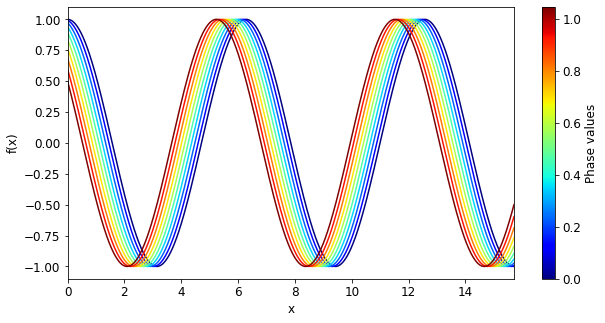

In [ ]:
# number of phases
nphases = 10

# values of the phases
phasevalues = np.linspace(0,np.pi/3,nphases)

# color index between 0 and 255 corressponding to each phase
thecol = (arange(nphases)*256/(nphases-1)).astype(int)

# x values
x = np.linspace(0, 5*np.pi, 1000)
for i in range(nphases):
  plot(x, np.cos(x+phasevalues[i]), color=get_cmap(rcParams['image.cmap'])(thecol[i]))
xlim(0, 5*np.pi)
ylim(-1.1, 1.1)
xlabel('x')
ylabel('f(x)')

# the magic lines to be added
scatter(-phasevalues*0-10, -phasevalues*0-10,c=phasevalues)
aa=colorbar()
aa.ax.set_ylabel('Phase values')

## Evolution of the Angular Power Spectrum with cosmological parameters

In this section we will investigate how the CMB angular power spectrum evolves with cosmological parameters, reproducing figure similar to those shown during Lecture 4.

### Curvature
**Question 1:** You are requested to loop over 100 values of $\Omega_k$ between -0.03 and 0.03 and calculate in each case the angular power spectrum leaving all the other parameters unchanged (do not use the Planck values from above but the default ones from PICO). Display these power spectra in the same figure with the colors and colormap trick explained above.

In [ ]:
# Type your code here

When we change curvature density (remember the definition of curvature density, opposite to the logic: $\Omega_k=1-\left(\Omega_m+\Omega_\Lambda\right)$): in a closed Universe - negative $\Omega_k$, the opening angle of photons is larger than in a flat one, so that the sound horizon at the time of decoupling is seen at larger scales.

## Changing $H_0$

**Question 2:** Do the same but changing $H_0$ between 60 and 80 km/sec/Mpc.

In [ ]:
# Type your code here

We clearly see in the above plot that increasing $H_0$ shifts the spectra towards lower multipoles (larger scales). This is understandable if one remembers that the angular distance is $D_a(z)\propto \int\frac{\mathrm{d}z}{H(z)}$, therefore increasing $H_0$ means that the same strucure (here the sound horizon at the time of decoupling) is at a lower angular distance, and therefore subtends a larger angle on the sky.

## Changing baryon content
**Question 3:** Now let's change the baryon content time $h^2$ of the Universe $\Omega_b h^2$ between 0.0205 and 0.0245, while keeping the total amount of matter constant (therefore constant curvature and dark energy). We can change $\Omega_b h^2$ and leave $H_0$ constant for that.

NB: You can try to go beyond the indicated range, but you will probably start seeing weird behaviour as you are getting out of the PICO training range... this is the biggest limitation of PICO with respect to the "real software" like CAMB or CLASS.

In [ ]:
# Type your code here

As explained in the lectures, increasing baryons increases the constrast between even and odd peaks (odd peaks tend to reduce).

# CMB Maps

The CMB comes from all direcftions in the sky and we are interested in its angular power spectrum. If we want to analyse it properly, we need to handle images of the CMB (that we call "maps") that preserve its angular properties. This means dealing with the fact that it is on a sphere which has curvature with respect to usual flat projected maps that are commonly used in astronomy when dealing with small images for which curvature remains negligible. On the large angular scales involved in CMB analysis, curvature cannot be neglected and the best way to deal with it is to have our maps directly on the sphere, with an adequate pixellisation of the sphere so that we do not manipulate projected data, but only use projection for plottong purposes.

The most commonly (and almost exclusively) used sky pixellisation called Healpix (https://sourceforge.net/projects/healpix/). This is an equal area, iso-latitude pixellisation of the sphere where the numbering of the pixels obeys a simple hierarchical rule. This allows fast and efficient Spherical Harmonics transforms which is of course a very nice feature for CMB. Helpix has a nice python implementation called "Healpy".

Let's directly see what a healpix map looks like:
- there are 12 basic pixels in a Healpix map. This basic hierarchical level is known as $n_{side}=1$. They have the approximate shape of diamonds. 

<img src="https://skyview.gsfc.nasa.gov/images/hpx1.jpg"> 

- Then they can be subdivided as many times as one wishes through the `nside` parameter and are placed on the sphere according to the following scheme.

<img src="https://healpix.jpl.nasa.gov/images/gorski_f1.jpg">

Although it is now possible to use any integer for the parameter nside, the common habit is to only use powers of 2 for nside. This is mostly inheritance of the first versions of Healpix, about 20 years ago, when nside could only be powers of two.

Helpix comes with two main projections fopr displaying the spherical maps:
- Mollweide projection for full sky viewing: https://en.wikipedia.org/wiki/Mollweide_projection. Thos projection offers a good compromise regarding preservation of shapes and proportions...
- Gnomonic projection for smaller regions: https://en.wikipedia.org/wiki/Gnomonic_projection. This projection displays great circles as straight lines, which is a nice property.
- other projections are available but less commonly used.

Let's first play with the Mollweide projection for which the healpy

In the following cell you can play with the nside parameter that you should vary nside from 1 to whatever power of two you would like to see. The number of pixels and their angular size is calculated and displayed. Beyond nside = 1024 you will really have a lot of pixels, so don't go too much beyond this... 

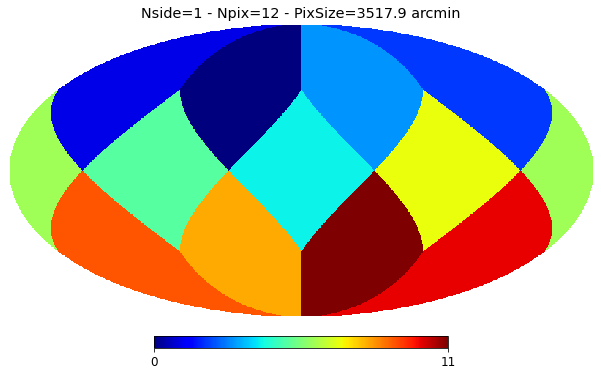

In [ ]:
nside = 1
map = np.arange(12*nside**2)
hp.mollview(map, 
            title='Nside={0:} - Npix={1:} - PixSize={2:5.1f} arcmin'.format(nside, 
                                  12*nside**2,hp.nside2resol(nside, arcmin=True)))

## Fast Spherical Harmonics Transforms with Healpix
As you remember, we are interested in the angular power spectrum of the CMB, which we obtain throught the variance of the Spherical Harmonics Transform coefficients of the map, the $a_{\ell m}$:
$$\frac{\Delta T}{T}\left(\vec{n}\right) = \sum_\ell \sum_{m=-\ell}^\ell a_{\ell m} Y_\ell^m(\vec{n})$$
(where $\vec{n}$ is a unit vector on the sphere pointing towards $(\theta,\phi)$).

Therefore:
$$a_{\ell m} = \int \frac{\Delta T}{T}\left(\vec{n}\right)Y_\ell^{m\star}(\vec{n})\mathrm{d}\vec{n}$$
The Spherical Harmonics can be split into azimuthal and zenithal parts:
$$Y_\ell^m(\vec{n}) = \lambda_\ell^m(\theta) \exp(i m\phi)$$
Therefore, when discretizing the integral to work with pixels, one has:
$$\begin{eqnarray}
a_{\ell m} &=& \int \frac{\Delta T}{T}\left(\vec{n}\right)Y_\ell^{m\star}(\vec{n})\mathrm{d}\vec{n} \\
&=& \frac{4\pi}{N_{pix}} \sum_{\mathrm{pixels}~k}  \frac{\Delta T}{T}\left(\theta_k, \phi_k\right) \lambda_\ell^m(\theta_k) \exp(i m\phi_k) \\
\end{eqnarray} $$
For each value of $\theta_k$ (zenithal angle), we make the sum over each of the $k'$ pixels over all azimuthal values:
$$\begin{eqnarray}
a_{\ell m} &=& \frac{4\pi}{N_{pix}} \sum_{\theta_k}  \lambda_\ell^m(\theta_k) \sum_{\phi_{k'}} \frac{\Delta T}{T}\left(\theta_k, \phi_{k'}\right)\exp(i m\phi_{k'})\\
&=& \frac{4\pi}{N_{pix}} \sum_{\theta_k}  \lambda_\ell^m(\theta_k) E_m(\theta_k)
\end{eqnarray}$$
where $E_m(\theta_k)$ is just the FFT (Fast Fourier Transform) of the azimuthal values of the map at a given zenith angle:
$$E_m(\theta_k) = \sum_{\phi_{k'}} \frac{\Delta T}{T}\left(\theta_k, \phi_{k'}\right)\exp(i m\phi_{k'})$$

This latter trick is the main reason for using Healpix maps instead of other pixellisations and allows fast Sherical Hamronic Transforms. A similar trick can be used to generate a pixellized map from input $a_{\ell m}$ values of course.

## Simple maps examples
Let's generate a map from its power spectrum with only one non-zero $\ell$ in order to see how scales on the sky relate to $\ell$ values. You can change `nside` and the values of $\ell$ that are set to 1. The generation of the maps is made with the built-in hp.synfast() function that generates $a_{\ell m}$ with random gaussian phases and a variance given by the input $C_\ell$. We call this a "Realization" of the power spectrum.

NB: If you run the simulation multiple times, the images will change somehow, as you make each time a new realization of the same underlying power spectrum. If you were to average between many images. with the same input power spectrum, each of them would have a slightly different power spectrum but the average would match the input one. We will play with this a bit later.

/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


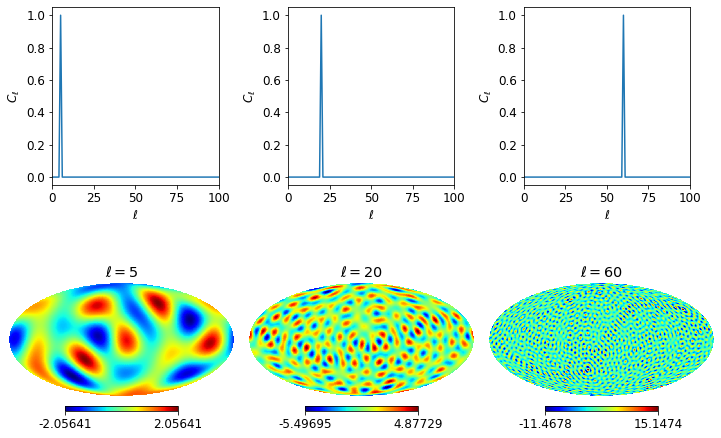

In [ ]:
rc('figure',figsize=(10,6))
nside = 128
non_zero_ell = [5, 20, 60]

for i in range(len(non_zero_ell)):
  cell = np.zeros(3*nside)
  cell[non_zero_ell[i]] = 1.
  subplot(2,3,i+1)
  plot(cell)
  xlim(0,100)
  xlabel('$\ell$')
  ylabel('$C_\ell$')
  themap = hp.synfast(cell, nside)
  hp.mollview(themap, sub=(2,3,i+4), title='$\ell={}$'.format(non_zero_ell[i]))
  tight_layout()

## Calculating power spectra from maps:
Here we use a Planck reduced resolution map at nside=256 . Note that the map we read here has been previously cleaned for foregrounds as is discussed later in the lectures (and this is a whole research area). 


total 99888
drwxr-xr-x 1 root root     4096 May  4 16:26 sample_data
-rw-r--r-- 1 root root      727 May 14 07:39 adc.json
-rw-r--r-- 1 root root 99120769 May 14 07:39 jcset_py3.dat
-rw-r--r-- 1 root root  3153600 May 14 09:19 PlanckSmica_ns256.fits


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


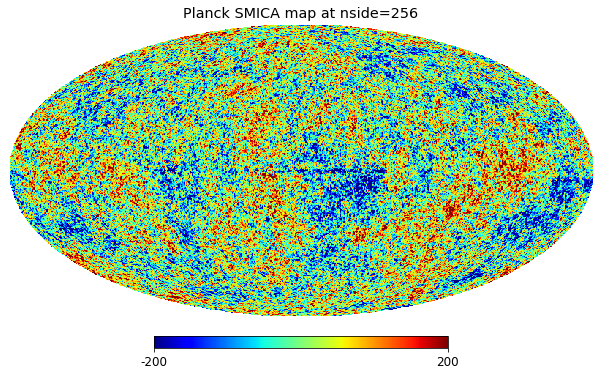

In [ ]:
### Download Planck SMICA map from Google Drive
download = drive.CreateFile({'id': '1KCa1FoB8H13o497FDSZr9BXd7R2Y2DqW'})
download.GetContentFile('PlanckSmica_ns256.fits')
!ls -lrt

# read the map
themap = hp.read_map('PlanckSmica_ns256.fits')
nside = hp.npix2nside(len(themap))

# visualize it
hp.mollview(themap, min=-200,max=200, title='Planck SMICA map at nside={}'.format(nside))


We can have a look at details of the map using the hp.gnomview() function that returns a gnomonic projection as mentionned earlier:

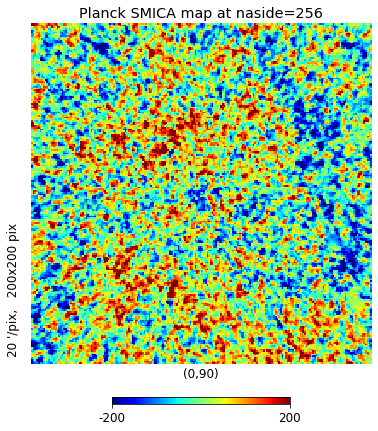

In [ ]:
# visualize it
hp.gnomview(themap, rot=[0,90], reso=20, min=-200,max=200, title='Planck SMICA map at naside={}'.format(nside))

hp.gnomview() needs extra arguments with respect to healpix: the direction in the sky that should be at  the center with the keyword "rot" and the resolution of pixellized projection in arcminutes per image pixel with the keyword "reso".

We can directly calculate the angular power spectrum of this map using the built-in hp.anafast() function of Healpix. I recommend not calculating power spectra beyond $l_{max}=2\times nside$ as the SMICA map is slightly biased beyond and Healpix also looses significant accuracy that far in $\ell$. This is done with the kweyword lmax=2*nside added to the call to anafast(). In such a case, the returned power spectrium will have lmax+1 elements:

Text(0, 0.5, '$C_\\ell$ (Raw)')

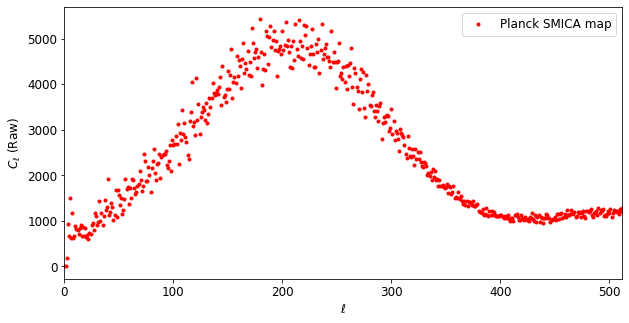

In [ ]:
# calculate the Cl
clplanck = hp.anafast(themap, lmax=2*nside)
ll = arange(2*nside+1)
dlplanck_raw = clplanck * ll * (ll+1) / 2/ np.pi
plot(ll, dlplanck_raw,'r.',label='Planck SMICA map')
xlim(0, np.max(ll))
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$C_\ell$ (Raw)')

Let's now compare the angular power spectrum we just calculated from the Planck maps with the theoretical expectations from PICO (with the Planck fitted cosmological parameters):

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

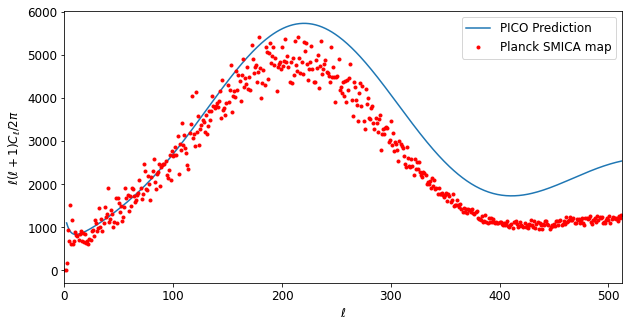

In [ ]:
#### PICO calculation of the theoretical power spectrum
inputs = pico.example_inputs()
planck_pars = inputs.copy()
planck_pars['As'] = np.exp(3.094)/1e10
planck_pars['H0'] = 67.27
planck_pars['ns'] = 0.9645
planck_pars['ombh2'] = 0.02225
planck_pars['omch2'] = 0.1198
planck_pars['omk'] = 0.
planck_pars['tau'] = 0.079
dl_TT = pico.get(**planck_pars)['dl_TT']
ell = np.arange(len(dl_TT-2))+2

#### Plotting both
clf()
plot(ell, dl_TT, label='PICO Prediction')
plot(ll, dlplanck_raw,'r.',label='Planck SMICA map')
xlim(0, 2*nside+1)
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

Not a big success... Something is missing here !

Indeed we did not account for two important observational effects:
- The angular resolution of Planck: as any telescope Planck does not have infinite angular resolution, it is limited by the size of the mirror and the observation wavelenght... In the case of Planck the Point-Spread-Function is well approximated by a Gaussian with a Full-Width at Half-Maximum FWHM=10 arcminutes (observing at 150 GHz with a 1 meter mirror gives 8.4 arcminutes, but additional effects sum up to 10 arcminutes). You may remember that the realtionship between FWHM and $\sigma$ is $FWHM = 2.35 \times \sigma$. The angular resolution corresponds to a convolution by a kernel in map-space and there fore a multiplication by the harmonic trasnsform of the kernel in Harmonic space (like with Fourier transforms). For a Gaussian point-spread-function with width given by $\sigma$ (angle on the sky in radians), the corresponding function in harmonic space is also a Gaussian given by:
$$B_\ell = \exp(-\frac{1}{2}\ell^2 \sigma^2)$$
Note that the $C_\ell$ being a variance, the effect of the resolution on the $C_\ell$  is a multiplication by the square of $B_\ell$.

- The pixels of the Healpix maps also smooth the real sky map as we average measurements within the area of the pixel. This is once more a convolution in map-space (by the shape of the pixels) and therefore a multiplication in Harmonic space, by a function directly. given bby the Healpix library called the "pixel window function":
```
pixwin = hp.pixwin(nside)
```
Similarly as for the angular resolution effect, the $C_\ell$ are multiplied by the square of the pixel window function.

These two effects explain why we did not find a good matching between our power spectrum measured on the Planck map and the theoretical expecations. We need to correct the measured power spectrum for the two effects we mentionned in order to have something that no longer depends on the onstrument characteristics and pixellisation scheme.

**Question 4:** Display the planck power spectrum corrected from the two effects before and see how it matches well with the theoretical prediction from PICO. Beware, the vector returned by hp.pixwin() may not have the same number of elements as your measured $C_\ell$ so you will have to deal with that... 

In [ ]:
# Type your code here

This much better !!

# Making a Monte-Carlo Simulation
We will now perform a Monte-Carlo simulation in order to reveal two major effects we have to deal with when working with real data:
1. Noise Bias
2. Sample Variance

In order to do so, you will simulate $N=30$ maps with the same underlying power spectrum, we will add a certain level of Gaussian white noise on the maps and calculate the power spectra of these maps, average them and calculate their variances. 

So you need to write a loop over the 30 realization, make a sky realization as above, make noise map that you will add to the sky map, calculate the power spectrum and store it into a variable over which you will make average and RMS at the end. In order to reveal the effect of sample variance and noise bias, for each realization you need to calculate the power of the map without noise, with noise and the power of the noise alone.

In order to simulate random white noise use the function:
```
noise = np.random.randn(npix) * RMSnoise
```
with a RMS noise of the order of $100\mu K$.

Remember that synfast() takess $C_\ell$ as an entry, not $D_\ell$ as provided by PICO (a factor $\ell(\ell+1)/2\pi$). Additionnaly, if you want to simulate the two smoothing effects we discussed earlier in your simulated maps, you need to specifiy it to synfast with:
```
sky = hp.synfast(cl_TT, nside, pixwin=True, fwhm=np.radians(10./60))
```

**Question 5:** Perform this monte carlo simulation and calculate the average and RMS power spectra (using numpy's mean() and std() functions) for sky with no noise, sky with noise and noise only, correcting them for beam and pixel window function. Display all of the mean spectra in a plot of $\ell(\ell+1) C_\ell/2\pi$ as a function of $\ell$.

NB: you will see some disagreements at very low $\ell$ as well as a slight disagrement on the peak of the power spectrum. This is because we have not taken all subtel effects into account here, let's neglect these differences.

In [ ]:
# Type your code here

You should obtain the following result:
- The average of sky without noise should be almost unbiased except at very low $\ell$ and a slight bias near the peak of the spectrum at $\ell~200$.
- The average of the $C_\ell$ of the Sky+Noise should be significantly above the expected result.
- The average of the noise should be a quadratically increasing function of $\ell$.

### Noise Bias:
The above result is absolutely normal if you remember that your noisy sky map is the sum of the noiseless sky map and the noise map (we use vector notation for the map as there are npix pixels):
$$ \vec{m} = \vec{s}+\vec{n}$$

As a result, if we go to power spectrum, one expects:
$$C_\ell[\vec{m}] = C_\ell[\vec{s}] + C_\ell[\vec{n}]$$
In other words, you can unbias the map+noise power spectrum by removing the noise bias 

Furthermore, for white noise, the noise bias can be calculated analytically and is:
$$C_\ell[\vec{n}] = \sigma^2_{noise} \times \frac{4\pi}{npix}$$

**Question 6:** Test these two relationship in the following cell: plot the difference between the Sky+Noise spectra and the noise only and show that it matches the input theoretical power spectrum (or the noiseless sky ones). Also show that the noise bias power spectrum agrees well with the above formula.

In [ ]:
# Type your code here

You should obtain a much better agreement with the input model (as good as what you obtained without noise).

### Studying the RMS of the power spectra

One can predict the behaviour of the uncertainties, there are two contribution:
1. variance from noise: the noise you added not only adds power to the power spectrum but also has fluctuations around this mean noise bias.
2. sample variance: the noiseless sky itself has varied among the realization as each time you run synfast() you draw new random realizations of $a_{\ell m}$. Only their variance is on average that of the input power spectrum. So for a given sky realization (for instance the one we observe from Earth) we expect that this sky has some so called "sample-variance" with respect to the "true underlyong power spectrum" that you could only get from observing an infinite number of CMB realizations, or from an infinite number of locations in the Universe.

These two effects actually follow the same very simple law that can be derived in the following manner:
- the $C_\ell$ is a variance at a given $\ell$ over $a_{\ell m}$ whose distribution is Gaussian with average zero by construction. There are $2\ell +1$ values of $m$ for each $\ell$. So this means that in order to calculate our empirical $C_\ell$, we average the modulus square of the $a_{\ell m}$ over these $2\ell+1$ possibles $m$ values:
$$C_\ell = Var(a_{\ell m}) = \frac{1}{2\ell+1} \sum_{m=-\ell}^{\ell} \left| a_{\ell m}\right|^2$$
- If a random variable $x$ is gaussian distributed with variance $\sigma^2$ then the random variable $x/\sigma$ is normal distrubuted and summing squares of realizations of this variable $\sum_n x_i^2/\sigma^2$ is $\chi^2$-distributed with $n$ degree of freedom and therefore has variance $Var(\sum_n x_i^2/\sigma^2)=2n$. Therefore we have:
$$Var(\sum_n x_i) = 2n\sigma^4$$
as a consequence
$$\begin{eqnarray}
Var(\frac{1}{n} \times \sum_n x_i) &=& \frac{1}{n^2}\times 2n\times\sigma^4 \\
&=& \frac{2}{n}\sigma^4 \\
&=& \frac{2}{n}\times Var(x)^2
\end{eqnarray}$$
So one can apply that to the $C_\ell$ formula above:
$$Var\left(\frac{1}{2\ell+1} \sum_{m=-\ell}^{\ell} \left| a_{\ell m}\right|^2\right) = \frac{2}{2\ell+1}\times Var(a_{\ell m})^2$$
Applied to the variance of the $C_\ell$ we get:
$$Var(C_\ell) = \frac{2}{2\ell+1} C_\ell^2$$
and so the RMS on the $C_\ell$ shoud be:
$$RMS[C_\ell] = \sqrt{\frac{2}{2\ell+1}}\times C_\ell$$

This applies to both the signal and noise power spectra and the total RMS is the sum of both.

**Question 7:** Now plot in the following cell the RMS of your Monte-Carlo power spectra and the expected behaviour from the above considerations. You will see an excellent agreement.

In [ ]:
# Type your code here

END of TD3